Enter the load setpoint in watts (positive integer):
3200
Setpoint achievable. Relays activated:
Relay 2 ON (Power: 3000W)
Relay 9 ON (Power: 200W)


<ipython-input-1-aa3ffa6808b8>:28: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  relay = patches.Rectangle((1, len(load_steps) - i), 1, 0.8, color=relay_color, edgecolor="black")


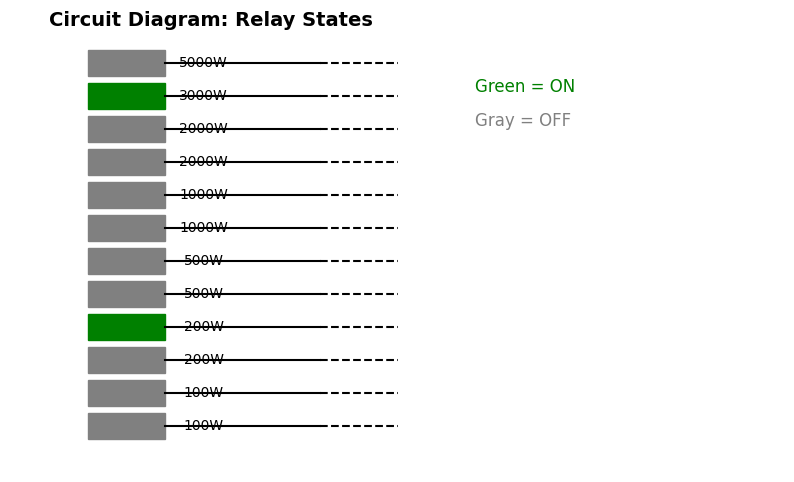

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load bank steps
load_steps = [5000, 3000, 2000, 2000, 1000, 1000, 500, 500, 200, 200, 100, 100]

def calculate_relays(setpoint):
    relay_states = [False] * len(load_steps)
    for i in range(len(load_steps)):
        while setpoint >= load_steps[i]:
            setpoint -= load_steps[i]
            relay_states[i] = True

    if setpoint == 0:
        return relay_states
    else:
        return None  # in case setpoint not achievable

def visualize_circuit(relay_states):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, len(load_steps) + 2)
    ax.axis("off")

    for i, state in enumerate(relay_states):
        # Drawing the relay as a rectangle
        relay_color = "green" if state else "gray"
        relay = patches.Rectangle((1, len(load_steps) - i), 1, 0.8, color=relay_color, edgecolor="black")
        ax.add_patch(relay)

        # Drawing the load step
        load_text = f"{load_steps[i]}W"
        ax.text(2.5, len(load_steps) - i + 0.4, load_text, va="center", ha="center", fontsize=10)

        # Drawing the connecting lines
        ax.plot([2, 4], [len(load_steps) - i + 0.4, len(load_steps) - i + 0.4], color="black")
        ax.plot([4, 5], [len(load_steps) - i + 0.4, len(load_steps) - i + 0.4], color="black", linestyle="--")

    # Title and legend
    ax.text(0.5, len(load_steps) + 1.5, "Circuit Diagram: Relay States", fontsize=14, fontweight="bold")
    ax.text(6, len(load_steps) - 0.5, "Green = ON", color="green", fontsize=12)
    ax.text(6, len(load_steps) - 1.5, "Gray = OFF", color="gray", fontsize=12)

    plt.show()

def main():
    print("Enter the load setpoint in watts (positive integer):")
    try:
        setpoint = int(input())
        if setpoint <= 0:
            print("Error: Invalid setpoint. Must be a positive integer.")
            return

        relay_states = calculate_relays(setpoint)
        if relay_states:
            print("Setpoint achievable. Relays activated:")
            for i, state in enumerate(relay_states):
                if state:
                    print(f"Relay {i + 1} ON (Power: {load_steps[i]}W)")

            # Visualizing the circuit using blocks
            visualize_circuit(relay_states)
        else:
            print("Error: Setpoint not achievable with available load steps.")
    except ValueError:
        print("Error: Invalid input. Please enter a positive integer.")

if __name__ == "__main__":
    main()
